# Notebook for plotting some simulation results

Importing the necessary packages for plotting

In [15]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt

# Setting size of the fonts in the figure to 16
plt.rcParams.update({
    "font.size" : 16,
    })


In [16]:
models = ["mat_osc_lin_a_0em3", "mat_osc_lin_a_1em6", "mat_osc_lin_a_1em3", "mat_osc_lin_a_m1em3"]
labels = ["$A = 0$", "$A = 10^{-6}$", "$A = 10^{-3}$", "$A = -10^{-6}$"]


Specify the configurations of the simulation

In [17]:
nz = 2400
nvz = 64
cfl = 0.4

ID = f"{nz}_{nvz}_{cfl}" 
model = models[1]


Looking for the configuration file in the job folder and lading them if exists

In [18]:
data_folder = os.path.join(
    "../",
    model,
    ID,
)

with open (os.path.join(data_folder, "job.config"), "r") as f:
    configs = yaml.load(f, Loader=yaml.FullLoader)


In [19]:
print(data_folder)


../mat_osc_lin_a_1em6/2400_64_0.4


Creating the folder to save the plots if does not exist already.

In [20]:
save_plots_at = os.path.join(
    "./", 
    model,
    ID,
)

if not os.path.exists(save_plots_at):
    os.makedirs(save_plots_at)


Replicating the grid and bins according to the configuration for plotting.

In [21]:
dz = (configs['z1'] - configs['z0']) / nz
dt = cfl * dz 
dvz = (configs['v1'] - configs['v0']) / nvz

z = configs['z0'] + (np.arange(nz) + 0.5) * dz 
vz = configs['v0'] + (np.arange(nvz) + 0.5) * dvz
snaps = np.arange(0, configs["N_ITER"], configs["ANAL_EVERY"])


Loding the conserved quantities data from the data_folder as ```numpy array```

In [22]:
Dconserved_qty = np.genfromtxt(
    os.path.join(data_folder, f"{ID}_conserved_quantities.dat")
)


Plotting $\delta P_{max}$, $\langle\delta P\rangle$ and $\langle\delta\bar P\rangle$

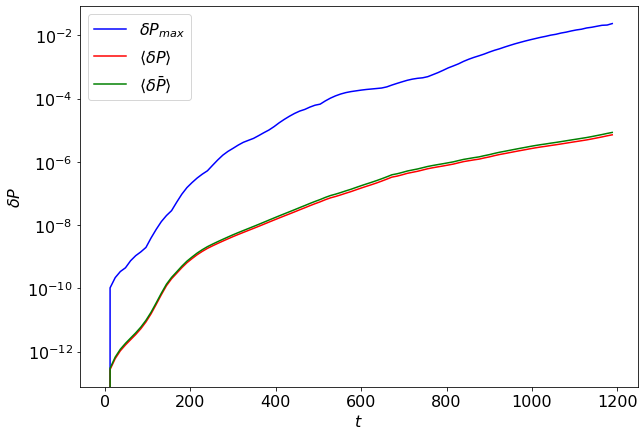

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.subplots()

t = Dconserved_qty[:, 0]*dt # Slicing the iteration data and multiplying with dt to get physical time
dP = Dconserved_qty[:, 1] # Slicing dP_max data
dP_avg = Dconserved_qty[:, 2] # Slicing average dP data
dbP_avg = Dconserved_qty[:,3] # Same as the above, but for dP-bar

ax.plot(t, dP, color = 'blue', label = r"$\delta P_{max}$") # Plotting dP_max as a function of physical time.
ax.plot(t, dP_avg, color = 'red', label = r"$\langle\delta P\rangle$") # Same as above for dP_avg
ax.plot(t, dbP_avg, color = 'green', label = r"$\langle\delta\bar P\rangle$") # ... 
ax.set_yscale('log') # Setting logarithmic scale for y-axis of the plot

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\delta P$')

ax.legend()

plt.show()


In [24]:

survival_probability = np.genfromtxt(
    os.path.join(data_folder, f"{ID}_survival_probability.dat")
)


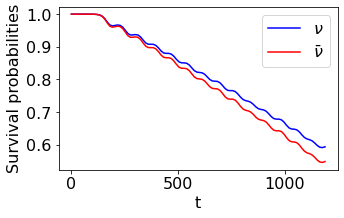

In [25]:
fig = plt.figure(figsize=(5, 3))
ax = fig.subplots()

t = survival_probability[:, 0]*dt # Slicing the iteration data and multiplying with dt to get physical time
nusur = survival_probability[:, 1] # Slicing dP_max data
bnusur = survival_probability[:, 2] # Slicing average dP data

ax.plot(t, nusur, color = 'blue', label = r"$\nu$") # Plotting dP_max as a function of physical time.
ax.plot(t, bnusur, color = 'red', label = r"$\bar\nu$") # Same as above for dP_avg

ax.set_xlabel(r't')
ax.set_ylabel('Survival probabilities')

ax.legend()

plt.show()


In [26]:
G0 = np.fromfile(
    os.path.join(data_folder, f"{ID}_G0.bin"),
    dtype=np.float64,
)
g0 = G0[0::2].reshape(nz, nvz)
bg0 = G0[1::2].reshape(nz, nvz)

g = g0 - bg0

for i, snap in enumerate(snaps[:]):
    end = "\n" if i%10 == 0 else "\t"
    print(f"{i}/{len(snaps)}", end=end)
    data_file = os.path.join(data_folder, f"{ID}_rho_{snap}.dat")
    data = np.genfromtxt(data_file, dtype=np.float64)
    P3 = data[:, 2].reshape(nz, nvz).T
    levels = np.linspace(-1.0, 1.0,100)
    img = plt.contourf(z, vz, P3, cmap="RdBu", levels=100, extend='both')
    title = f"$P_3$, A = $1.0\\times10^{-3}$, t = {snap*dt:.2f}"
    plt.title(title)
    cbar = fig.colorbar(img, ax=plt.gca())
    plt.savefig(
        os.path.join(save_plots_at, f"P3_{model}_{snap}_{i}.jpeg"),
        dpi=100, bbox_inches="tight"
    )
    plt.clf()


0/100
1/100	2/100	3/100	4/100	5/100	6/100	7/100	8/100	9/100	10/100
11/100	12/100	13/100	14/100	15/100	16/100	17/100	18/100	19/100	20/100
21/100	22/100	23/100	24/100	25/100	26/100	27/100	28/100	29/100	30/100
31/100	32/100	33/100	34/100	35/100	36/100	37/100	38/100	39/100	40/100
41/100	42/100	43/100	44/100	45/100	46/100	47/100	48/100	49/100	50/100
51/100	52/100	53/100	54/100	55/100	56/100	57/100	58/100	59/100	60/100
61/100	62/100	63/100	64/100	65/100	66/100	67/100	68/100	69/100	70/100
71/100	72/100	73/100	74/100	75/100	76/100	77/100	78/100	79/100	80/100
81/100	82/100	83/100	84/100	85/100	86/100	87/100	88/100	89/100	90/100
91/100	92/100	93/100	94/100	95/100	96/100	97/100	98/100	99/100	

<Figure size 432x288 with 0 Axes>

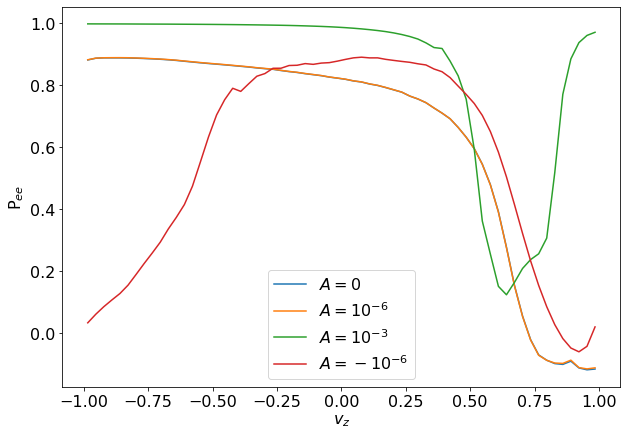

In [29]:
fig = plt.figure(figsize=(10, 7))
plt.rcParams.update({
    "font.size" : 16,
    })
for i, model in enumerate(models):
    snapid = 80
    data_folder = os.path.join(
        "../",
        model,
        ID,
    )
    data_file = os.path.join(data_folder, f"{ID}_rho_{snaps[snapid]}.dat")
    data = np.genfromtxt(data_file, dtype=np.float64)
    P3 = data[:, 2].reshape(nz, nvz).T
    surp = P3.sum(axis=1)/nz
    plt.plot(vz, surp, label=labels[i])
    plt.xlabel("$v_z$")
    plt.ylabel("P$_{ee}$")
    plt.legend()
plt.show()
    

In [28]:
model


'mat_osc_lin_a_m1em3'